# Linear Regression Series - Part 2

Link Blog: [**Klik di sini**](https://www.alokademy.com/2023/02/linear-regression-series-part-2.html.html)

### Import package yang diperlukan

In [1]:
from matplotlib import pyplot
import numpy as np
import random

### Membuat sample dataset

In [2]:
features = np.array([1,2,3,5,6,7])
labels = np.array([1.55, 1.97, 2.44, 3.56, 4.07, 4.48])

print(features)
print(labels)

[1 2 3 5 6 7]
[1.55 1.97 2.44 3.56 4.07 4.48]


### Membuat plot

In [3]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('jumlah kamar')
    pyplot.ylabel('harga')

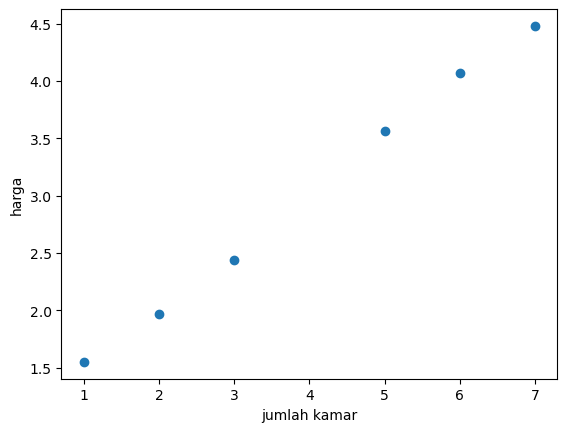

In [4]:
plot_points(features, labels)

### Memindahkan garis menggunakan square trick

In [5]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    #perbarui model
    predicted_price = base_price + price_per_room*num_rooms
    
    #perbarui slope (harga per kamar)
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    
    #perbarui y-intercept (harga dasar rumah)
    base_price += learning_rate*(price-predicted_price)
    
    return price_per_room, base_price

### Menjalankan algoritma Linear Regression
* Mulai dengan bobot acak
* Jalankan square trick berkali-kali

In [6]:
# menggunakan random seet supaya hasil yang didapatkan selalu sama
random.seed(1)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment salah satu baris berikut untuk mendapatkan plot dengan epoch yang berbeda
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
            
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)
    
    # buat plot untuk garis final
    draw_line(price_per_room, base_price, 'red', starting=0, ending=8)
    plot_points(features, labels)
    
    print('Harga per kamar:', price_per_room)
    print('Harga dasar:', base_price)
    
    return price_per_room, base_price

Harga per kamar: 0.5099699559850331
Harga dasar: 0.9866319723142626


(0.5099699559850331, 0.9866319723142626)

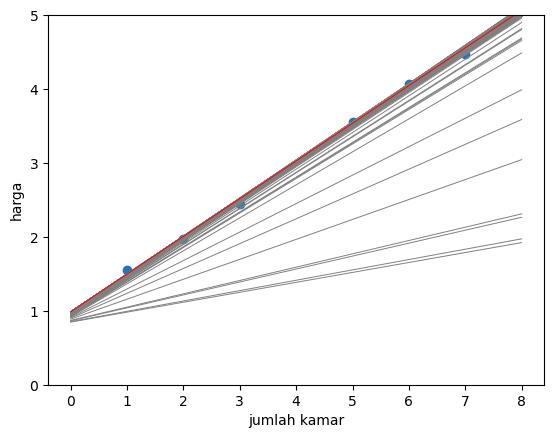

In [7]:
# Mengatur tinggi sumbu x
pyplot.ylim(0,5)

# panggil fungsi linear regression
linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

Garis yang abu-abu adalah garis perantara yang dihasilkan selama proses perulangan, dan garis merah adalah garis final atau model yang dihasilkan